In [1]:
import ATS_Analysis as ats
import pandas as pd
import numpy as np
import seaborn as sb

%matplotlib inline

In [2]:
patient_list = ['P100', 'P101', 'P102', 'P103', 'P104', 'P105', 'P106', 'P107', 'P108', 'P109', 'P110',
                'P112', 'P113', 'P114', 'P115', 'P116', 'P117','P118', 'P119', 'P120',
                'P121', 'P122']
df = ats.get_data(patient_list, [10, 60, 120, 240])

P100 30 16 9
P101 116 37 28
P102 49 1 1
P103 28 16 15
P104 104 0 0
P105 113 46 14
P106 30 15 15
P107 4 1 1
P108 27 1 1
P109 33 6 6
P110 94 33 31
P112 23 7 7
P113 88 35 30
P114 51 13 13
P115 77 10 10
P116 8 5 5
P117 56 41 41
P118 43 13 10
P119 180 44 43
P120 17 14 14
P121 61 13 13
P122 129 59 57


In [3]:
df.win.value_counts()

240    364
120    346
60     336
10     326
Name: win, dtype: int64

In [4]:
grouped = df.groupby(['win'])

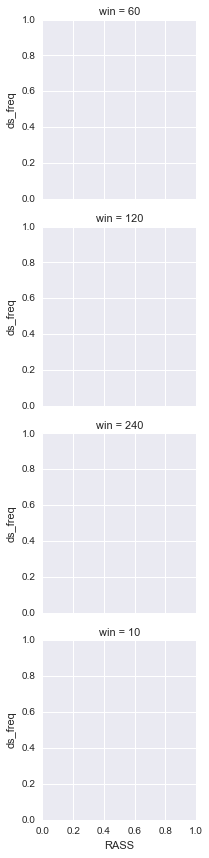

C:\Users\sottilep\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


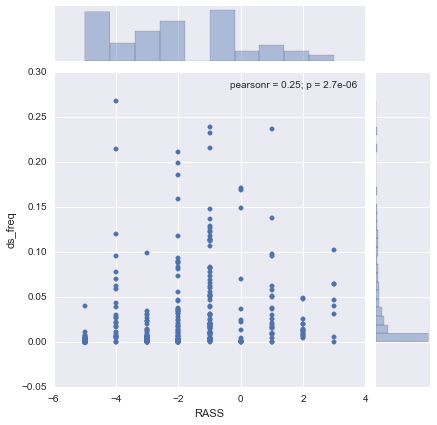

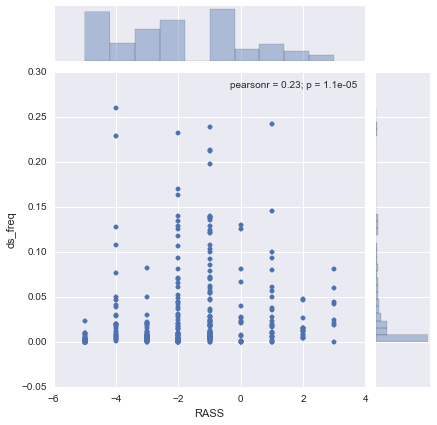

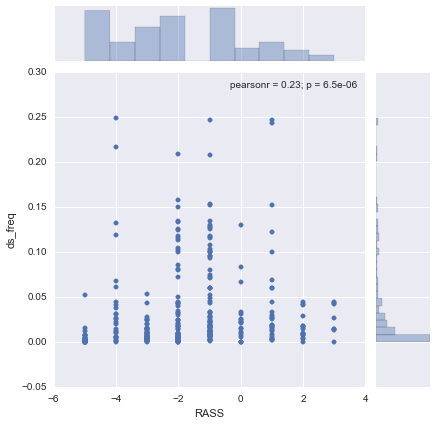

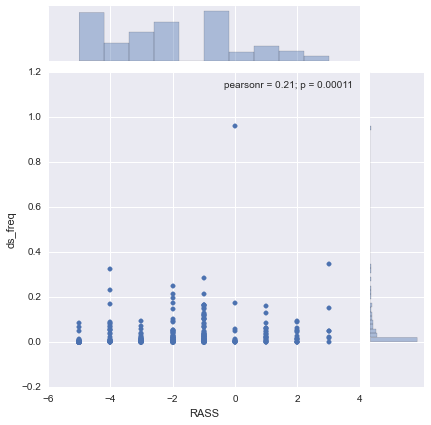

In [8]:
face = sb.FacetGrid(df, row='win', sharey=False)
face.map(sb.jointplot,'RASS', 'ds_freq', kind='scatter')

OrderedDict([(10, <matplotlib.axes._subplots.AxesSubplot at 0x1152bac8>),
             (60, <matplotlib.axes._subplots.AxesSubplot at 0x1f36d3c8>),
             (120, <matplotlib.axes._subplots.AxesSubplot at 0xa1340b8>),
             (240, <matplotlib.axes._subplots.AxesSubplot at 0xa216ac8>)])

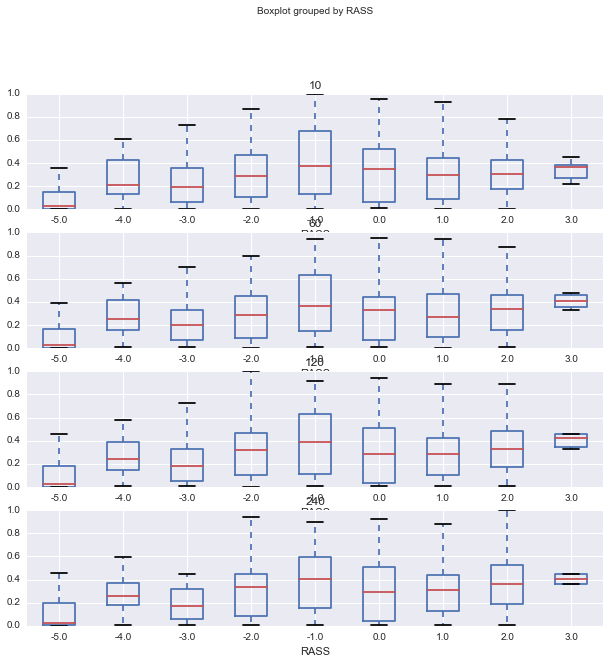

In [9]:
grouped.boxplot(column='ie_freq', by='RASS', layout=(6,1), figsize=(10,15))

OrderedDict([(10, <matplotlib.axes._subplots.AxesSubplot at 0x10e494e0>),
             (60, <matplotlib.axes._subplots.AxesSubplot at 0x110287f0>),
             (120, <matplotlib.axes._subplots.AxesSubplot at 0x1120d940>),
             (240, <matplotlib.axes._subplots.AxesSubplot at 0x11245cf8>)])

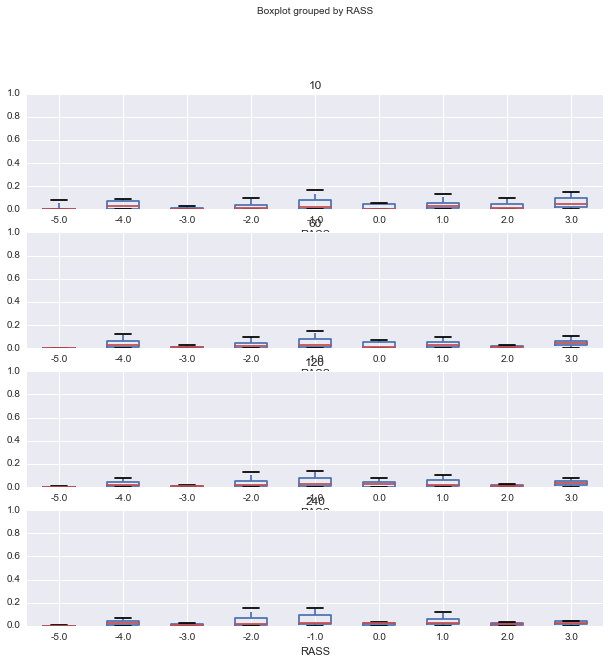

In [15]:
grouped.boxplot(column='ds_freq', by='RASS', layout=(6,1), figsize=(10,15))

OrderedDict([(10, <matplotlib.axes._subplots.AxesSubplot at 0x10ce2e48>),
             (60, <matplotlib.axes._subplots.AxesSubplot at 0x109ad8d0>),
             (120, <matplotlib.axes._subplots.AxesSubplot at 0x109f87b8>),
             (240, <matplotlib.axes._subplots.AxesSubplot at 0x10a37390>)])

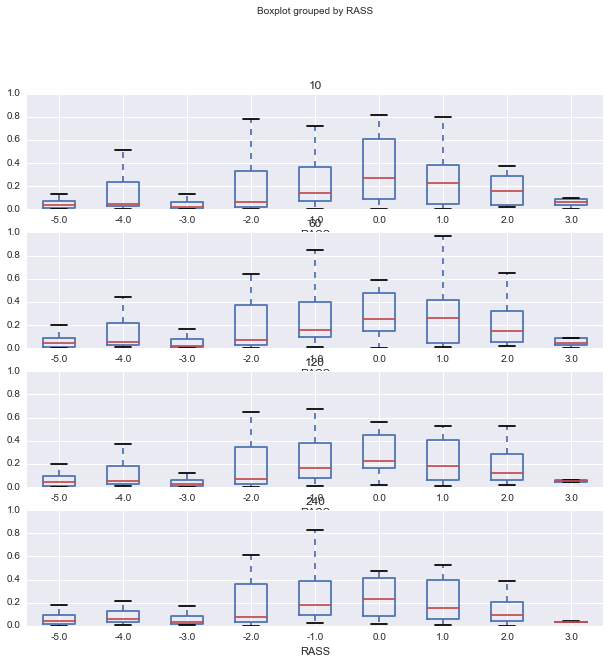

In [14]:
grouped.boxplot(column='pl_freq', by='RASS', layout=(6,1), figsize=(10,15))

In [ ]:
grouped = df.groupby(['win', 'RASS'])
grouped[['ds_freq', 'pl_freq', 'ie_freq']].min().unstack(level=0)

In [ ]:
grouped[['ds_rolling','tot_rolling', 'ds_freq']].median().unstack(level=0)